This python code is from https://github.com/kLabUM/rrcf. 

M. Bartos, A. Mullapudi, & S. Troutman, rrcf: Implementation of the Robust Random Cut Forest algorithm for anomaly detection on streams, in: Journal of Open Source Software, The Open Journal, Volume 4, Number 35. 2019


RRCF data are created by the C++ program.

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [16]:

df = pd.read_csv('../../../../RocEdgeOut/rrcf_nyc_taxi/rrcf_nyc_taxi.csv',
         header=None,index_col=None )
avg_codisp = pd.Series(df.iloc[:,0])

Compare with IsolationForest

In [18]:
# Read data
taxi = pd.read_csv('../../../../RocEdgeAppsData/numenta/nyc_taxi.csv', index_col=0)
taxi.index = pd.to_datetime(taxi.index)
data = taxi['value'].astype(float).values

# Create events
events = {
    'independence_day' : ('2014-07-04 00:00:00',
                          '2014-07-07 00:00:00'),
    'labor_day'        : ('2014-09-01 00:00:00',
                          '2014-09-02 00:00:00'),
    'labor_day_parade' : ('2014-09-06 00:00:00',
                          '2014-09-07 00:00:00'),
    'nyc_marathon'     : ('2014-11-02 00:00:00',
                          '2014-11-03 00:00:00'),
    'thanksgiving'     : ('2014-11-27 00:00:00',
                          '2014-11-28 00:00:00'),
    'christmas'        : ('2014-12-25 00:00:00',
                          '2014-12-26 00:00:00'),
    'new_year'         : ('2015-01-01 00:00:00',
                          '2015-01-02 00:00:00'),
    'blizzard'         : ('2015-01-26 00:00:00',
                          '2015-01-28 00:00:00')
}
taxi['event'] = np.zeros(len(taxi))
for event, duration in events.items():
    start, end = duration
    taxi.loc[start:end, 'event'] = 1

# Set tree parameters
num_trees = 200

H:\ProgramVault\Anaconda3\envs\dl\lib\site-packages\sklearn\ensemble\_iforest.py:245: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(


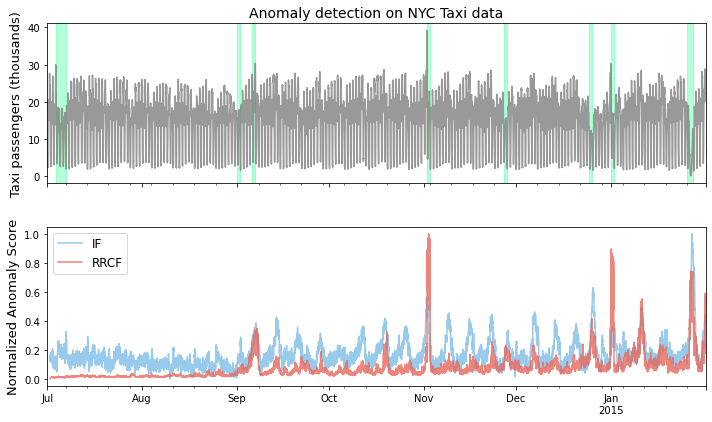

In [25]:

avg_codisp.index = taxi.iloc[(shingle_size - 1):].index
points = df.iloc[:,1:].to_numpy()
shingle_size =48

contamination = taxi['event'].sum()/len(taxi)
IF = IsolationForest(n_estimators=num_trees,
                     contamination=contamination,
                     behaviour='new',
                     random_state=0)
IF.fit(points)
if_scores = IF.score_samples(points)
if_scores = pd.Series(-if_scores,
                      index=(taxi
                             .iloc[(shingle_size - 1):]
                             .index))

# Normalize anomaly scores to (0, 1)
avg_codisp = ((avg_codisp - avg_codisp.min())
              / (avg_codisp.max() - avg_codisp.min()))
if_scores = ((if_scores - if_scores.min())
             / (if_scores.max() - if_scores.min()))

fig, ax = plt.subplots(2, figsize=(10, 6))
(taxi['value'] / 1000).plot(ax=ax[0], color='0.5',
                            alpha=0.8)
if_scores.plot(ax=ax[1], color='#7EBDE6', alpha=0.8,
               label='IF')
avg_codisp.plot(ax=ax[1], color='#E8685D', alpha=0.8,
                label='RRCF')
ax[1].legend(frameon=True, loc=2, fontsize=12)

for event, duration in events.items():
    start, end = duration
    ax[0].axvspan(start, end, alpha=0.3,
                  color='springgreen')

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('Taxi passengers (thousands)', size=13)
ax[1].set_ylabel('Normalized Anomaly Score', size=13)
ax[0].set_title('Anomaly detection on NYC Taxi data',
                size=14)

ax[0].xaxis.set_ticklabels([])

ax[0].set_xlim(taxi.index[0], taxi.index[-1])
ax[1].set_xlim(taxi.index[0], taxi.index[-1])
plt.tight_layout()

